In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [32]:
print("Image data shape" , digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


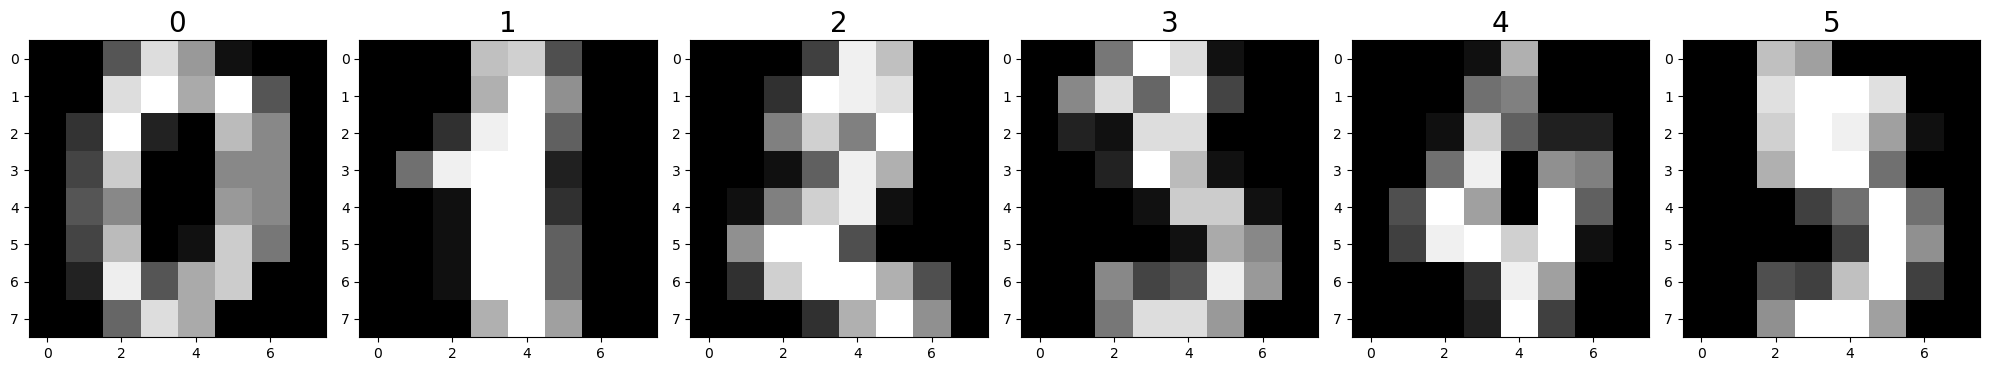

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a single-line plot with same-sized ... images pixel is activated and unactivated pattern
plt.figure(figsize=(20, 4))  # Width=20, Height=4 ensures uniform size
for index, (image, label) in enumerate(zip(digits.data[:6], digits.target[:6])):
    plt.subplot(1, 6, index + 1)  # 1 row, 5 columns
    plt.imshow(np.reshape(image, (8, 8)), cmap='gray')
    plt.title(f'{ label}', fontsize=20)
    

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [66]:
#split the data into train and test datasets
from sklearn.model_selection import train_test_split
#23% data is used for training datasets
x_train , x_test , y_train , y_test = train_test_split(digits.data , digits.target,test_size = 0.23 , random_state = 2) 

In [68]:
print(x_train.shape)
print(y_train.shape)

(1383, 64)
(1383,)


In [70]:
#print(x_test , y_test) #prints the data matrix
print(x_test.shape , y_test.shape) #prints the shape of test data


(414, 64) (414,)


In [78]:
from sklearn.linear_model import LogisticRegression


In [82]:
#create an instance of logistic regression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

In [90]:
# returns a numpy array
#predict for one observation
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [94]:
logisticRegr.predict(x_test[0:10])


array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [96]:
predictions = logisticRegr.predict(x_test)

In [98]:
#score method to test the accuracy of the dataset
score = logisticRegr.score(x_test , y_test)
print(score)

0.9541062801932367


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [104]:
#instance of confusion matrix
#perdictions are the predicted values  from y_test known values
#The more the numbers in the diagonal better the accuracy is
#matrix add up = number of observations in the test dataset

cm = metrics.confusion_matrix(y_test , predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


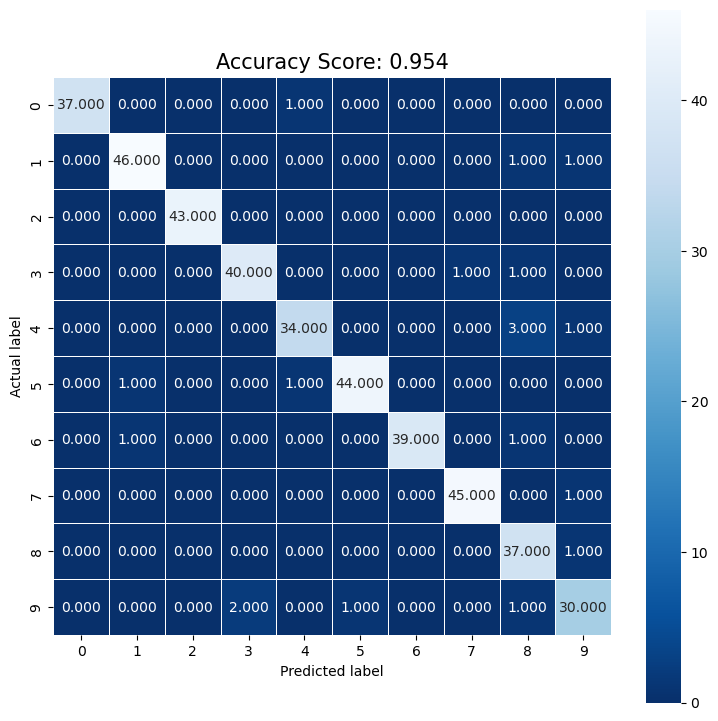

In [108]:
#Accuracy Score = Matrix add up / total number of test values
#confusion matrix visualizatin using heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")           
plt.xlabel("Predicted label")        
all_sample_title = "Accuracy Score: {0:.3f}".format(score)
plt.title(all_sample_title, size=15)
plt.show()

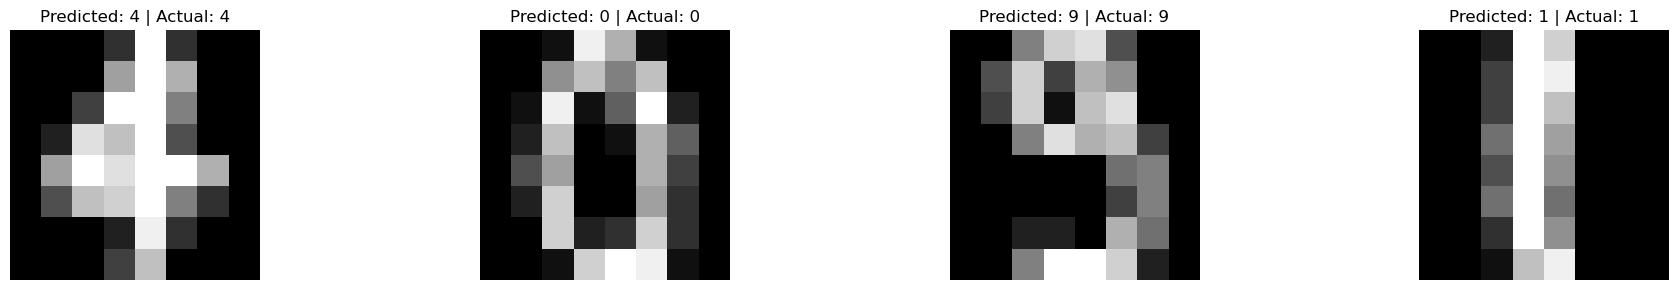

In [118]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20, 3))
for plotIndex, correct in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[correct], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {} | Actual: {}".format(predictions[correct], y_test[correct]), fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()
